#Evaluación 1 - Diplomado Data Science Duoc UC

# Módulo: Machine Learning

A continuación, aplicarás lo aprendido con el uso de las librerías de Python desde fuentes de datos proporcionadas por el relator.

**Recuerda almacenar una copia de este Jupyter Notebook en tu Google Drive para poder ejecutar los bloques de código.**


---
* Ejecución técnica de un procedimiento de  Análisis Exploratorio de datos
  * Deberá cargar los datos del CSV a pandas
  * Deberá identificar las columnas relevantes y realizar la unión de los datos
  * Deberá identificar las columnas más relevantes del negocio y proponer una rutina de limpieza
  * Separar la información entre las columnas relevantes y ejecutar su rutina de limpieza
  * Identificar la correlación de las columnas e identificar las más relevantes
  * Proponga 5 gráficos que otorguen valor a los datos y describa el conocimiento que puede extraer de éstos
---


# Contexto: 

Una empresa anónima, nos encargó la importante misión de predecir como serán sus próximas ventas basados en sus datos transaccionales. Para falicitar el proyecto de Análisis de Datos, nos proporcionó 3 datasets que necesitaremos relacionar para poder responder a la demanda de nuestro cliente. 
La primera fase de nuestro proyecto consistirá en un análisis exploratorio que nos permitirá conocer del negocio, saber qué venden, cuantos clientes manejan en sus sistemas, entre otras preguntas relevantes que nos permitirán plantear diversas hipótesis respecto de los datos. 

**Recuerda hacer uso de todo lo aprendido! mientras más cosas descubras de los datos, más robusto será tu análisis.** 

# Análisis Exploratorio de Datos

## Importar las librerias necesarias

In [ ]:
# Importe las librerias necesarias para trabajar aquí
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from datetime import datetime

## Cargar fuentes de datos

In [ ]:
# Cargue los archivos CSV necesarios aquí
!wget https://www.dropbox.com/s/i9edv1p4ufk6apl/datos_ventas.csv
!wget https://www.dropbox.com/s/f2774ywx6a0vhwn/datos_clientes.csv
!wget https://www.dropbox.com/s/bk66vergl5vuofj/datos_trabajador.csv

--2022-08-09 15:44:48--  https://www.dropbox.com/s/i9edv1p4ufk6apl/datos_ventas.csv
Resolving www.dropbox.com (www.dropbox.com)... 162.125.2.18, 2620:100:6023:18::a27d:4312
Connecting to www.dropbox.com (www.dropbox.com)|162.125.2.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/i9edv1p4ufk6apl/datos_ventas.csv [following]
--2022-08-09 15:44:49--  https://www.dropbox.com/s/raw/i9edv1p4ufk6apl/datos_ventas.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc6948d6ffd34e14a2b94ba2c69e.dl.dropboxusercontent.com/cd/0/inline/BqsOp1u7MgFHQqKbn6Qj6EmfmrNSyKTrYFVwWwF9cKKt5Ke1T-2vNETaV2278abcDZPcnLs40eNhrHgh9OKklqHbb17N5oRlsrOTXWBi2E_UpJpxPrtQDwMA1ULhZo8QQvrM_T7jcPxNqrDlz5j_StIj1A8hxJ0YebrsUEBTR53C8w/file# [following]
--2022-08-09 15:44:49--  https://uc6948d6ffd34e14a2b94ba2c69e.dl.dropboxusercontent.com/cd/0/inline/BqsOp1u7MgFHQqKbn6Qj6EmfmrNSyKTrYFVwWwF9cKKt5Ke1T-2vNET

### Ventas

In [ ]:
# Realice análisis de los datos del CSV 1
df_ventas = pd.read_csv("datos_ventas.csv", sep = "|")

In [ ]:
df_ventas.dtypes

VENTA_ID            int64
CAJERO_ID           int64
COMPRADOR_ID        int64
FECHA_VENTA        object
MONTO_TOTAL        object
CODIGO_PRODUCTO    object
NOMBRE_PRODUCTO    object
CODIGO_FAMILIA      int64
NOMBRE_FAMILIA     object
CANTIDAD           object
dtype: object

In [ ]:
df_ventas

,VENTA_ID,CAJERO_ID,COMPRADOR_ID,FECHA_VENTA,MONTO_TOTAL,CODIGO_PRODUCTO,NOMBRE_PRODUCTO,CODIGO_FAMILIA,NOMBRE_FAMILIA,CANTIDAD
0,26,7,32,"22/08/19 19:43:18,000000000",Q.-1500.,7802215104855,Costa Rama,4,CONFITES-GALLETAS,"1,0"
1,49,7,91,"23/08/19 14:08:25,000000000",Q.4050-.,7801810712663,LIPTON YELLOW 40g. 20UN.,1,OFERTAS ESPECIALES,"1,0"
2,49,7,399,"23/08/19 14:08:25,000000000",Q.4050-.,7802575006035,CORBATAS CARO.400g.,1,OFERTAS ESPECIALES,"1,0"
3,49,7,92,"23/08/19 14:08:25,000000000",Q.4050-.,7801875032010,TÉ SUPREMO 40g. 20UN.,1,OFERTAS ESPECIALES,"1,0"
4,49,7,177,"23/08/19 14:08:25,000000000",Q.4050-.,7808743601934,ACEITE MERKAT 900ml.,1,OFERTAS ESPECIALES,"1,0"
...,...,...,...,...,...,...,...,...,...,...
1748,49987,5,20,"28/11/19 15:47:25,000000000",Q.-300.,7802575222954,JUGO SPRIM FRUTILLA 1L. 35g.,8,JUGOS-NECTAR,"2,0"
1749,52296,4,62,"02/12/19 13:13:30,000000000",Q.-1750.,7801610001295,COCACOLA ORIGINAL RETORNABLE 2.0L,11,BEBIDAS COCA COLA,"1,0"
1750,52831,4,487,"03/12/19 12:22:43,000000000",Q.-1150.,ENVASE,ENVASE BEBIDA,1,OFERTAS ESPECIALES,"1,0"
1751,61835,5,111,"19/12/19 16:48:53,000000000",Q.-1900.,ENVASE,* TRIAL * TRI,1,OFERTAS ESPECIALES,"1,0"


In [ ]:
df_ventas.dtypes

VENTA_ID            int64
CAJERO_ID           int64
COMPRADOR_ID        int64
FECHA_VENTA        object
MONTO_TOTAL        object
CODIGO_PRODUCTO    object
NOMBRE_PRODUCTO    object
CODIGO_FAMILIA      int64
NOMBRE_FAMILIA     object
CANTIDAD           object
dtype: object

In [ ]:
df_ventas.describe()

,VENTA_ID,CAJERO_ID,COMPRADOR_ID,CODIGO_FAMILIA
count,1753.000000,1753.000000,1753.000000,1753.000000
mean,4988.726184,3.828865,249.451797,4.426127
std,6754.533366,2.322299,145.613872,4.225431
min,26.000000,2.000000,1.000000,1.000000
25%,1311.000000,2.000000,123.000000,1.000000
50%,2817.000000,2.000000,246.000000,1.000000
75%,6065.000000,7.000000,378.000000,7.000000
max,62325.000000,7.000000,500.000000,13.000000


### Clientes

In [ ]:
# Realice análisis de los datos del CSV 2
df_clientes = pd.read_csv("datos_clientes.csv", sep = ",")

In [ ]:
df_clientes

,id_cliente,primer_nombre,apellido_paterno,apellido_materno,correo,genero,idioma,estado_civil,cant_hijos,edad,estudios,Color_F
0,1,Ibby,Plewes,Izac,iizac0@cnbc.com,Female,Lithuanian,Otro,1,1,RMA,Celeste
1,2,Doralia,Ewell,Townsend,dtownsend1@ow.ly,Female,Armenian,Viudo,2,2,IEX Total View,Azul
2,3,Lynette,Merrydew,Feaveryear,lfeaveryear2@aol.com,Female,Papiamento,Soltero,3,3,RMI,Celeste
3,4,Janaye,Jeffryes,Anglim,janglim3@ameblo.jp,Female,Georgian,Casado,4,4,MTP3,Azul
4,5,Travus,Divis,Minchindon,tminchindon4@sourceforge.net,Male,Northern Sotho,Casado,1,5,RMI,Amarrillo
...,...,...,...,...,...,...,...,...,...,...,...,...
495,496,Skyler,Carmichael,Warlock,swarlockdr@hubpages.com,Male,Estonian,Otro,4,41,Unit Testing,Morado
496,497,Kelly,Mincini,Flanner,kflannerds@xrea.com,Female,Assamese,Soltero,1,42,Unit Testing,Azul
497,498,Curtice,Gillivrie,Hoys,choysdt@google.it,Male,Aymara,Otro,2,43,Xpress,Otro
498,499,Kristal,Barniss,Maso,kmasodu@zdnet.com,Female,Kannada,Viudo,3,44,SDTM,Verde


In [ ]:
df_clientes.describe()

,id_cliente,cant_hijos,edad
count,500.000000,500.000000,500.000000
mean,250.500000,2.500000,32.100000
std,144.481833,1.119154,18.557445
min,1.000000,1.000000,1.000000
25%,125.750000,1.750000,16.000000
50%,250.500000,2.500000,32.000000
75%,375.250000,3.250000,48.000000
max,500.000000,4.000000,65.000000


### Trabajador

In [ ]:
# Realice análisis de los datos del CSV 3
df_trabajador = pd.read_csv("datos_trabajador.csv", sep = ",")

In [ ]:
df_trabajador

,ID,CAJERO_ID,NOMBRE,APELLIDO,RUT
0,1,2,Zelda,Wiggins,23730488-8
1,2,3,Kaye,Bird,18659842-3
2,3,4,Sean,Tucker,12534101-2
3,4,5,Ulric,Lester,14004608-6
4,5,7,Hunter,Booth,13030165-7


In [ ]:
df_trabajador.describe()

,ID,CAJERO_ID
count,5.000000,5.000000
mean,3.000000,4.200000
std,1.581139,1.923538
min,1.000000,2.000000
25%,2.000000,3.000000
50%,3.000000,4.000000
75%,4.000000,5.000000
max,5.000000,7.000000


## Unir los CSV

In [ ]:
# Unir los CSV aquí
dataframe = pd.merge(df_trabajador, df_ventas, on = "CAJERO_ID", how = "inner").merge(df_clientes, left_on = "COMPRADOR_ID", right_on = "id_cliente", how = "inner")

dataframe

,ID,CAJERO_ID,NOMBRE,APELLIDO,RUT,VENTA_ID,COMPRADOR_ID,FECHA_VENTA,MONTO_TOTAL,CODIGO_PRODUCTO,...,apellido_paterno,apellido_materno,correo,genero,idioma,estado_civil,cant_hijos,edad,estudios,Color_F
0,1,2,Zelda,Wiggins,23730488-8,89,73,"24/08/19 16:38:51,000000000",Q.2700-.,7802575006035,...,Munnis,Rounsefull,trounsefull20@nymag.com,Male,Romanian,Otro,1,8,RMI,Verde
1,1,2,Zelda,Wiggins,23730488-8,337,73,"01/09/19 14:53:43,000000000",Q.3200-.,78019058,...,Munnis,Rounsefull,trounsefull20@nymag.com,Male,Romanian,Otro,1,8,RMI,Verde
2,1,2,Zelda,Wiggins,23730488-8,484,73,"01/09/19 18:20:06,000000000",Q.3550-.,78018884,...,Munnis,Rounsefull,trounsefull20@nymag.com,Male,Romanian,Otro,1,8,RMI,Verde
3,1,2,Zelda,Wiggins,23730488-8,4449,73,"08/09/19 20:13:28,000000000",Q.-1600.,7809611709622,...,Munnis,Rounsefull,trounsefull20@nymag.com,Male,Romanian,Otro,1,8,RMI,Verde
4,2,3,Kaye,Bird,18659842-3,607,73,"01/09/19 20:08:53,000000000",Q.-650.,7802900001230,...,Munnis,Rounsefull,trounsefull20@nymag.com,Male,Romanian,Otro,1,8,RMI,Verde
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1748,5,7,Hunter,Booth,13030165-7,6065,131,"12/09/19 13:24:27,000000000",Q.2700-.,HUEVO,...,Swire,Sproat,rsproat3m@homestead.com,Male,Hungarian,Otro,3,1,Unit Testing,Amarrillo
1749,5,7,Hunter,Booth,13030165-7,7554,349,"15/09/19 11:44:41,000000000",Q.-1800.,7802810021120,...,Van Velde,Dowty,ldowty9o@shop-pro.jp,Male,Ndebele,Viudo,1,24,PPC,Rojo
1750,5,7,Hunter,Booth,13030165-7,11096,335,"21/09/19 14:44:20,000000000",Q.6200-.,78007673,...,Mawford,Sirmon,rsirmon9a@goo.ne.jp,Male,Assamese,Casado,3,10,IEX Total View,Verde
1751,5,7,Hunter,Booth,13030165-7,11926,312,"23/09/19 14:07:12,000000000",Q.4400-.,78007673,...,Blunderfield,Ead,oead8n@cargocollective.com,Female,Dhivehi,Otro,4,52,JDK,Verde


## Analice los datos unidos, identifique columnas a limpiar y columnas a remover en caso de ser necesario. Justifique todas sus propuestas.

In [ ]:
# Análisis de los datos aquí
dataframe.isnull().sum()

ID                  0
CAJERO_ID           0
NOMBRE              0
APELLIDO            0
RUT                 0
VENTA_ID            0
COMPRADOR_ID        0
FECHA_VENTA         0
MONTO_TOTAL         0
CODIGO_PRODUCTO     0
NOMBRE_PRODUCTO     0
CODIGO_FAMILIA      0
NOMBRE_FAMILIA      0
CANTIDAD            0
id_cliente          0
primer_nombre       0
apellido_paterno    0
apellido_materno    0
correo              0
genero              0
idioma              0
estado_civil        0
cant_hijos          0
edad                0
estudios            0
Color_F             0
dtype: int64

In [ ]:
dataframe.count()

ID                  1753
CAJERO_ID           1753
NOMBRE              1753
APELLIDO            1753
RUT                 1753
VENTA_ID            1753
COMPRADOR_ID        1753
FECHA_VENTA         1753
MONTO_TOTAL         1753
CODIGO_PRODUCTO     1753
NOMBRE_PRODUCTO     1753
CODIGO_FAMILIA      1753
NOMBRE_FAMILIA      1753
CANTIDAD            1753
id_cliente          1753
primer_nombre       1753
apellido_paterno    1753
apellido_materno    1753
correo              1753
genero              1753
idioma              1753
estado_civil        1753
cant_hijos          1753
edad                1753
estudios            1753
Color_F             1753
dtype: int64

In [ ]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1753 entries, 0 to 1752
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ID                1753 non-null   int64 
 1   CAJERO_ID         1753 non-null   int64 
 2   NOMBRE            1753 non-null   object
 3   APELLIDO          1753 non-null   object
 4   RUT               1753 non-null   object
 5   VENTA_ID          1753 non-null   int64 
 6   COMPRADOR_ID      1753 non-null   int64 
 7   FECHA_VENTA       1753 non-null   object
 8   MONTO_TOTAL       1753 non-null   object
 9   CODIGO_PRODUCTO   1753 non-null   object
 10  NOMBRE_PRODUCTO   1753 non-null   object
 11  CODIGO_FAMILIA    1753 non-null   int64 
 12  NOMBRE_FAMILIA    1753 non-null   object
 13  CANTIDAD          1753 non-null   object
 14  id_cliente        1753 non-null   int64 
 15  primer_nombre     1753 non-null   object
 16  apellido_paterno  1753 non-null   object
 17  apellido_mater

Es necesario hacer una limpieza en las columnas "CANTIDAD" "MONTO_TOTAL" y "FECHA_VENTA" ya que con los tipos de datos que tienen no se puede realizar un análisis, ya que, en los 2 primeros como son "object" no se puede realizar un estudio matemático, mientras que en el tercero no se podrá filtrar por fecha, ya que también es de tipo "object".

# Propuesta de limpieza


## Proponga al menos 3 tareas de limpieza

Escríbalas acá justificando el por qué se debe realizar cada limpieza. 
En los bloques posteriores, ejecute las rutinas propuestas.

### Ventas

In [ ]:
# Ejecución de limpieza 1

dataframe["FECHA_VENTA"] = [x.replace(",", ".") for x in dataframe["FECHA_VENTA"]]
dataframe["FECHA_VENTA"] = dataframe["FECHA_VENTA"].astype("datetime64")

Agregué este método de limpieza para la columa "FECHA_VENTA" para transformar el tipo de dato "object" a "datetime64".

Ya que de esta forma podré utilizar los datos de esta columna como fecha y no como "object".

In [ ]:
dataframe["MES"] = dataframe["FECHA_VENTA"].dt.month.astype(int)

In [ ]:
dataframe["SEMANA"] = dataframe["FECHA_VENTA"].dt.week.astype(int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  """Entry point for launching an IPython kernel.


In [ ]:
# Ejecución de limpieza 2

# Información: https://es.stackoverflow.com/questions/218637/quitar-caracteres-y-letras-en-pandas
def dejar_solo_cifras(txt) -> int:
  return "".join(c for c in txt if c.isdigit())

dataframe["MONTO_TOTAL"] = dataframe["MONTO_TOTAL"].map(dejar_solo_cifras)
dataframe["MONTO_TOTAL"] = dataframe["MONTO_TOTAL"].astype(int)

Agregué este método de limpieza para la columa "MONTO_TOTAL" para transformar el tipo de dato "object" a "int64".

Ya que de esta forma podré utilizar esta columna matemáticamente y no como "object".

In [ ]:
# Ejecución de limpieza 3
def remove_null_monto_total(row) -> int:
    '''
    function to check if the "monto_total" is null and replace wth the mean from 
    the mean "monto_total" dataframe
    '''
    if pd.isnull(row['MONTO_TOTAL']):
        return mean_monto_total[row['genero'], row['estado_civil']]
    else:
        return row['MONTO_TOTAL']

mean_monto_total: int = dataframe.groupby(['genero', 'estado_civil'])['MONTO_TOTAL'].mean().round().astype(int)

dataframe['MONTO_TOTAL'] = dataframe.apply(remove_null_monto_total, axis = 1)

Este método de limpieza borra todos los valores nulos de la columna "MONTO_TOTAL" reemplazandolos por el promedio, el promedio fue calculado considerando el genero y el estado civil de la persona.

In [ ]:
# Ejecución de limpieza 4

dataframe["NOMBRE_PRODUCTO"] = dataframe["NOMBRE_PRODUCTO"].astype("string")

In [ ]:
# Ejecución de limpieza 5

dataframe["NOMBRE_FAMILIA"] = dataframe["NOMBRE_FAMILIA"].astype("string")

In [ ]:
# Ejecución de limpieza 6

# Información: https://stackoverflow.com/questions/31700691/convert-commas-decimal-separators-to-dots-within-a-dataframe
dataframe["CANTIDAD"] = [x.replace(",", ".") for x in dataframe["CANTIDAD"]]
dataframe["CANTIDAD"] = dataframe["CANTIDAD"].astype(float)
dataframe["CANTIDAD"] = dataframe["CANTIDAD"].round().astype(int)

Agregué este método de limpieza para la columa "CANTIDAD" para transformar el tipo de dato "object" a "int".

Ya que de esta forma podré utilizar esta columna matemáticamente y no como "object".

In [ ]:
# Ejecución de limpieza 7
def remove_null_cantidad(row) -> int:
    '''
    function to check if the "cantidad" is null and replace wth the mean from 
    the mean "cantidad" dataframe
    '''
    if pd.isnull(row['CANTIDAD']):
        return mean_monto_total[row['genero'], row['estado_civil']]
    else:
        return row['CANTIDAD']

mean_cantidad: int = dataframe.groupby(['genero', 'estado_civil'])['CANTIDAD'].mean().round().astype(int)

dataframe['CANTIDAD'] = dataframe.apply(remove_null_cantidad, axis = 1)

Este método de limpieza borra todos los valores nulos de la columna "CANTIDAD".

In [ ]:
# Ejecución de limpieza 8

dataframe["nombre_producto_simplificado"] = dataframe.loc[dataframe.NOMBRE_PRODUCTO.str.contains("TRIAL"), "NOMBRE_PRODUCTO"] = str("Trial")
dataframe["nombre_producto_simplificado"] = dataframe["nombre_producto_simplificado"].astype("string")

In [ ]:
# Ejecución de limpieza 9
venta: str = str("VENTA")

dataframe = dataframe.rename(columns = {
    "FECHA_VENTA": f"{venta}_fecha_venta",
    "MONTO_TOTAL": f"{venta}_monto_total",
    "CODIGO_PRODUCTO": f"{venta}_codigo_producto",
    "NOMBRE_PRODUCTO": f"{venta}_nombre_producto",
    "CODIGO_FAMILIA": f"{venta}_codigo_familia",
    "NOMBRE_FAMILIA": f"{venta}_nombre_familia",
    "CANTIDAD": f"{venta}_cantidad",
    "MES": f"{venta}_mes",
    "SEMANA": f"{venta}_semana",
    "nombre_producto_simplificado": f"{venta}_nombre_producto_simplificado"
})

### Trabajador

In [ ]:
# Ejecución de limpieza 10

dataframe["NOMBRE"] = dataframe["NOMBRE"].astype("string")

In [ ]:
# Ejecución de limpieza 11

dataframe["APELLIDO"] = dataframe["APELLIDO"].astype("string")

In [ ]:
# Ejecución de limpieza 12

dataframe["RUT"] = dataframe["RUT"].astype("string")

In [ ]:
# Ejecución de limpieza 13
trabajador: str = str("TRABAJADOR")

dataframe = dataframe.rename(columns = {
    "ID": f"{trabajador}_ID",
    "CAJERO_ID": f"{trabajador}_cajero_ID",
    "NOMBRE": f"{trabajador}_nombre",
    "APELLIDO": f"{trabajador}_apellido",
    "RUT": f"{trabajador}_rut"
})

### Cliente

In [ ]:
# Ejecución de limpieza 14

dataframe["primer_nombre"] = dataframe["primer_nombre"].astype("string")

In [ ]:
# Ejecución de limpieza 15

dataframe["apellido_paterno"] = dataframe["apellido_paterno"].astype("string")

In [ ]:
# Ejecución de limpieza 16

dataframe["apellido_materno"] = dataframe["apellido_materno"].astype("string")

In [ ]:
# Ejecución de limpieza 17

dataframe["correo"] = dataframe["correo"].astype("string")

In [ ]:
# Ejecución de limpieza 18

dataframe["genero"] = dataframe["genero"].astype("string")

In [ ]:
# Ejecución de limpieza 19

dataframe["idioma"] = dataframe["idioma"].astype("string")

In [ ]:
# Ejecución de limpieza 20

dataframe["estado_civil"] = dataframe["estado_civil"].astype("string")

In [ ]:
# Ejecución de limpieza 21

dataframe["estudios"] = dataframe["estudios"].astype("string")

In [ ]:
# Ejecución de limpieza 22

dataframe["Color_F"] = dataframe["Color_F"].astype("string")

In [ ]:
# Ejecución de limpieza 23

def remove_child(row):
  if row['edad'] < 16:
    return mean_customer_age[row['genero'], row['estado_civil'], row['cant_hijos']]
  else:
    return row['edad']

mean_customer_age: int = dataframe.groupby(['genero', 'estado_civil', 'cant_hijos'])['edad'].mean().round().astype(int)

dataframe['edad'] = dataframe.apply(remove_child, axis = 1)

Este método de limpieza reemplaza la edad de las personas menores de 16 años con la edad promedio, ya que es dificil que una persona de entre 0 a 15 años tenga un hijo.

In [ ]:
# Ejecución de limpieza 24
cliente: str = str("CLIENTE")

dataframe = dataframe.rename(columns = {
    "id_cliente": f"{cliente}_ID",
    "primer_nombre": f"{cliente}_primer_nombre",
    "apellido_paterno": f"{cliente}_apellido_paterno",
    "apellido_materno": f"{cliente}_apellido_materno",
    "correo": f"{cliente}_correo_electrónico",
    "genero": f"{cliente}_genero",
    "idioma": f"{cliente}_idioma",
    "estado_civil": f"{cliente}_estado_civil",
    "cant_hijos": f"{cliente}_cantidad_hijos",
    "edad": f"{cliente}_edad",
    "estudios": f"{cliente}_estudio",
    "Color_F": f"{cliente}_color_favorito"
})

In [ ]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1753 entries, 0 to 1752
Data columns (total 29 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   TRABAJADOR_ID                       1753 non-null   int64         
 1   TRABAJADOR_cajero_ID                1753 non-null   int64         
 2   TRABAJADOR_nombre                   1753 non-null   string        
 3   TRABAJADOR_apellido                 1753 non-null   string        
 4   TRABAJADOR_rut                      1753 non-null   string        
 5   VENTA_ID                            1753 non-null   int64         
 6   COMPRADOR_ID                        1753 non-null   int64         
 7   VENTA_fecha_venta                   1753 non-null   datetime64[ns]
 8   VENTA_monto_total                   1753 non-null   int64         
 9   VENTA_codigo_producto               1753 non-null   object        
 10  VENTA_nombre_producto   

## Identificación de correlación en las columnas

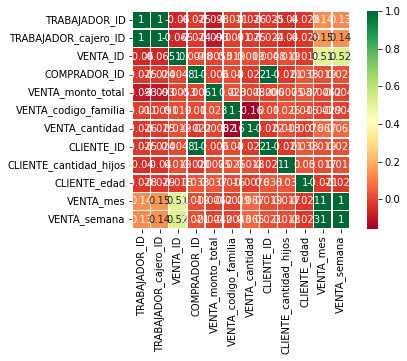

In [ ]:
# Identifique las correlación aquí
data = dataframe.corr()
annot: bool = bool(True)
cmap: str = str("RdYlGn")
square: bool = bool(True)
line_widths: float = float(0.5)

sns.heatmap(data = data,
            annot = annot,
            cmap = cmap,
            square = square,
            linewidths = line_widths)

Viendo este mapa de calor, nos dice que no se puede realizar una correlación como tal, aunque utilizando ciertos mecanismos se podrá encontrar alguna correlación.

In [ ]:
def GraficoCorrelacion(x,
                       y,
                       title: str,
                       xlabel: str,
                       ylabel: str) -> None:
  N: int = int(21)

  # fit a linear curve an estimate its y-values and their error.
  a, b = np.polyfit(x, y, deg = 1)
  y_est: int = a * x + b
  y_err: int = x.std() * np.sqrt(1/len(x) +
                                 (x - x.mean())**2 / np.sum((x - x.mean())**2))

  fig, ax = plt.subplots()
  ax.plot(x,
          y_est,
          '-')
  ax.fill_between(x,
                  y_est - y_err,
                  y_est + y_err,
                  alpha = 0.2)
  ax.plot(x,
          y,
          'o',
          color = 'tab:brown')

  ax.set_title(title)
  ax.set_xlabel(xlabel)
  ax.set_ylabel(ylabel)

  plt.show()

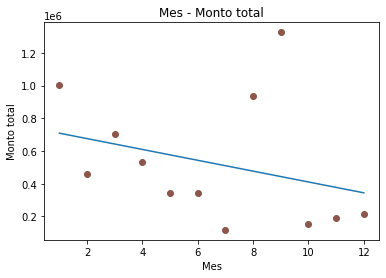

In [ ]:
# Agrupaciones por mes
df_mes = dataframe.groupby("VENTA_mes").sum()

# Resetear el indice
df_mes = df_mes.reset_index()



GraficoCorrelacion(x = df_mes["VENTA_mes"],
                   y = df_mes["VENTA_monto_total"],
                   title = "Mes - Monto total",
                   xlabel = "Mes",
                   ylabel = "Monto total")

Este gráfico hace compara el mes del año (eje x) con el monto total (eje y).

Como se puede observar en el gráfico, las ventas disminuyen a medida que pasa el año, a excepción de los meses de Septiembre u Agosto y, sin considerar estos 2 meses, se observa que hay una pequeña subida en las ventas.

Referente a los meses de Septiembre y Agosto, puedo suponer que las ventas subieron por algún festivo como las fiestas patrias.

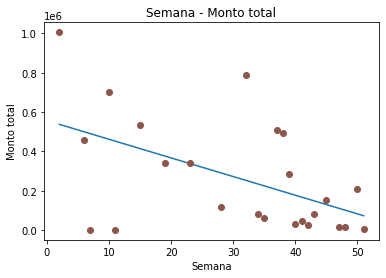

In [ ]:
# Agrupaciones por semana.
df_semana = dataframe.groupby("VENTA_semana").sum()

# Resetear el indice.
df_semana = df_semana.reset_index()



GraficoCorrelacion(x = df_semana["VENTA_semana"],
                   y = df_semana["VENTA_monto_total"],
                   title = "Semana - Monto total",
                   xlabel = "Semana",
                   ylabel = "Monto total")

El gráfico hace compara la semana del año (eje x) con el monto total (eje y).

Como se observa en el gráfico, hay una baja en las ventas durante el año, también se puede decir que a finales de año hay más ventas.

## Escribir una pequeña reseña de los resultados analizados y las correlaciones que  usaría para implementar un modelo de Machine Learning.

En ambos gráficos, el primero hace referencia al monto total por mes y el segundo hace referencia al monto total por semana, hay una disminución del monto total durante el año, aunque en el segundo gráfico se muestra que a finales del año hay más ventas.

## Proponga y describa al menos 5 gráficos que entregan valor al negocio y a la interpretación de los datos

In [ ]:
def GraficoTorta(data,
                 labels,
                 title: str) -> None:
  fig, ax = plt.subplots()

  ax.pie(x = np.array(data).ravel(),
         labels = labels,
         colors = sns.color_palette("bright"),
         autopct = str("%1.1f%%"),
         pctdistance = float(0.6),
         shadow = bool(False),
         startangle = int(90))
  
  # Titles
  ax.set_title(str(title))

  plt.show()

In [ ]:
def GraficoBarra(x,
                 y,
                 title: str,
                 xlabel: str,
                 ylabel: str) -> None:
  fig, ax = plt.subplots()
  ax.bar(x, y)

  # Titles
  ax.set_title(str(title))
  ax.set_xlabel(str(xlabel))
  ax.set_ylabel(str(ylabel))

  ax.legend()

  plt.show()

# Gráfico 1

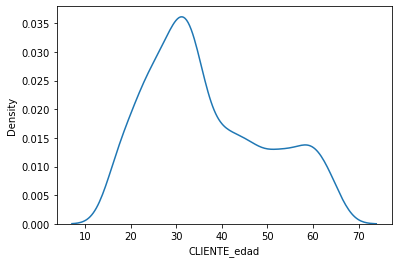

In [ ]:
# Programe el gráfico 1
sns.kdeplot(dataframe.CLIENTE_edad)

En el gráfico muestra la frecuencia de la edad de los clientes.

Se puede concluir que la mayoría de los clientes tienen alrededor de los 30 años.

# Gráfico 2

No handles with labels found to put in legend.


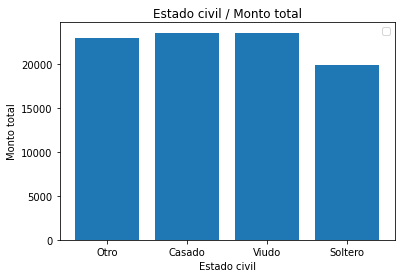

In [ ]:
# Programe el gráfico 2

GraficoBarra(x = dataframe["CLIENTE_estado_civil"],
             y = dataframe["VENTA_monto_total"],
             title = "Estado civil / Monto total",
             xlabel = "Estado civil",
             ylabel = "Monto total")

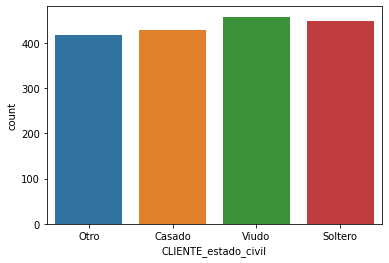

In [ ]:
# Programe el gráfico 2

sns.countplot(x = dataframe["CLIENTE_estado_civil"],
              data = dataframe.groupby(by = "VENTA_monto_total").count());

Se puede observar en el gráfico que las personas viudas son las que más compras, mientras que las personas en la categoría "otro" son los que menos compran.

Se puede concluir que las personas que están solas (viudo y soltero) son las que más compran, mientras que si tienen alguna relación, compran menos.

# Gráfico 3

No handles with labels found to put in legend.


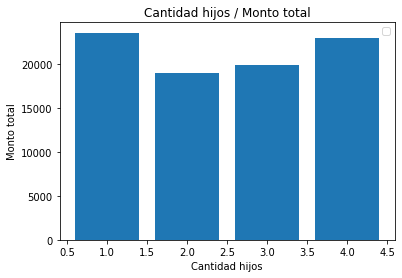

In [ ]:
# Programe el gráfico 3

GraficoBarra(x = dataframe["CLIENTE_cantidad_hijos"],
             y = dataframe["VENTA_monto_total"],
             title = "Cantidad hijos / Monto total",
             xlabel = "Cantidad hijos",
             ylabel = "Monto total")

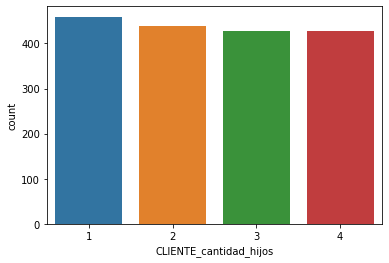

In [ ]:
# Programe el gráfico 3
sns.countplot(x = dataframe["CLIENTE_cantidad_hijos"],
              data = dataframe.groupby(by = "VENTA_monto_total").count())
plt.show()

Se puede observar en el gráfico que la mayoría de las personas tienen 1 hijo, mientras que la minoría de las personas tienen entre 3 o 4 hijos.

Se podría decir que mientras menos hijos tienes, más compras y viceversa (mientras más hijos tienes, menos compras).

# Gráfico 4

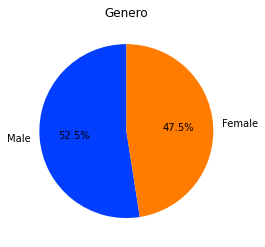

In [ ]:
# Programe el gráfico 4
GraficoTorta(
    data = dataframe["CLIENTE_genero"].value_counts().tolist(),
    labels = dataframe["CLIENTE_genero"].unique(),
    title = "Genero"
)

En este gráfico muetra la proporción de compra de los productos entre los hombres y las mujeres.

Se podría decir (en este contexto) ligeramente los hombres compran más que las mujeres.

# Gráfico 5

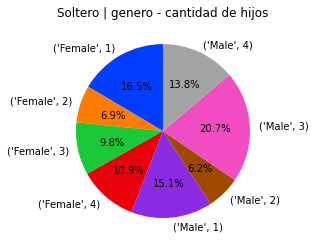

In [ ]:
# Programe el gráfico 5
data = pd.DataFrame(dataframe[dataframe.CLIENTE_estado_civil == "Soltero"].groupby(by = ['CLIENTE_genero', 'CLIENTE_cantidad_hijos'])['CLIENTE_estado_civil'].count())
labels = data.index

GraficoTorta(
    data = data,
    labels = labels,
    title = "Soltero | genero - cantidad de hijos"
)

Describa el valor que entrega este gráfico y como se podría complementar a la explicación del comportamiento de los datos.



En este gráfico muetra los compradores solteros separados en subgrupos, los cuales son:
1. Género.
2. Cantidad de hijos.

Se podría decir (en este contexto) que hay una tendencia a que los hombres compran más que las mujeres y que mientras más hijos tiene el hombre tiende a comprar más. En el caso de las mujeres, mientras más hijos tienen, menos compran.

# Gráfico 6

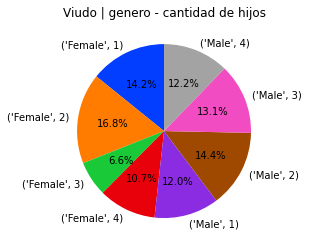

In [ ]:
# Programe el gráfico 6
data = pd.DataFrame(dataframe[dataframe.CLIENTE_estado_civil == "Viudo"].groupby(by = ['CLIENTE_genero', 'CLIENTE_cantidad_hijos'])['CLIENTE_estado_civil'].count())
labels = data.index

GraficoTorta(
    data = data,
    labels = labels,
    title = "Viudo | genero - cantidad de hijos"
)

:Describa el valor que entrega este gráfico y como se podría complementar a la explicación del comportamiento de los datos.

En este gráfico muestra la proporción de compra de las personas viudas separándolas en 2 grupos:
1. Género.
2. Cantidad de hijos.

Se podría decir (en este contexto) que casi el 50% de las personas viudas que compran son hombres y la otra mitad son mujeres. Referente a la cantidad de hijos, se ve que en el caso de los hombres es casi todo parejo, o sea, que si eres hombre viudo indistintamente de la cantidad de hijos existe casi la misma probabilidad de que compres algo, mientras que si eres mujer viuda hay es inversamente proporcional la compra con la cantidad de hijos.

# Gráfico 7

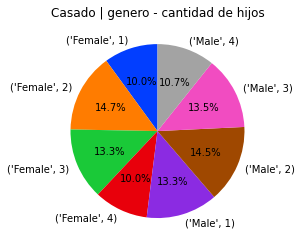

In [ ]:
# Programe el gráfico 7
data = pd.DataFrame(dataframe[dataframe.CLIENTE_estado_civil == "Casado"].groupby(by = ['CLIENTE_genero', 'CLIENTE_cantidad_hijos'])['CLIENTE_estado_civil'].count())
labels = data.index

GraficoTorta(
    data = data,
    labels = labels,
    title = "Casado | genero - cantidad de hijos"
)

En este gráfico muestra la proporción de compra de las personas casadas separándolas en 2 grupos:
1. Género.
2. Cantidad de hijos.

Se podría decir (en este contexto) que casi el 50% de las personas casadas que compran son hombres y la otra mitad son mujeres.

Referente a la cantidad de hijos, se ve que en el caso de los hombres es casi todo homogeneo, aunque con una ligera tendencia a que mientras más hijos tiene menos compra, mientras que en el caso de las mujeres igualmente es casi todo homogeneo, aunque compra más si tiene entre 2 a 3 hijos.

# Detalle aquí las conclusiones obtenidas respecto al dataset. Explique y complemente el análisis recalcando la importancia de la exploración de datos antes de comenzar a realizar modelos de Machine Learning.

En conclusión, con los datos obtenidos se podrá predecir las compras de las personas dependiendo de su genero, estado civil y candidad de hijos.